Dickey-Fuller Test: Check the stationarity of the time series
null hypothesis: the time series is non-stationary
if p-value < 0.05, reject the null hypothesis, the time series is stationary

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss
import json
import os

os.chdir("/Users/ruotsing/PycharmProjects/DMS")
with open('preprocess_data/SWA_data.json', 'r') as f:
    SWA_data = json.load(f)
    
for name in SWA_data.keys():
    adf_result = adfuller(SWA_data[name])
    kpss_result = kpss(SWA_data[name])
    print('-----------ADF test on SWA Data: '+ name + '-----------')
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('-----------KPSS test on SWA Data: '+ name + '-----------')
    print('KPSS Statistic: %f' % kpss_result[0])
    print('p-value: %f' % kpss_result[1])
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print('\t%s: %.3f' % (key, value))

/var/folders/sf/pzcl3wxn3ndfwtbfl9w667x80000gp/T/ipykernel_31829/1756679905.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(SWA_data[name])


-----------ADF test on SWA Data: emanuele-----------
ADF Statistic: -41.951323
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
-----------KPSS test on SWA Data: emanuele-----------
KPSS Statistic: 0.008321
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/sf/pzcl3wxn3ndfwtbfl9w667x80000gp/T/ipykernel_31829/1756679905.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(SWA_data[name])


-----------ADF test on SWA Data: michele-----------
ADF Statistic: -38.742363
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
-----------KPSS test on SWA Data: michele-----------
KPSS Statistic: 0.005331
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/sf/pzcl3wxn3ndfwtbfl9w667x80000gp/T/ipykernel_31829/1756679905.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(SWA_data[name])


-----------ADF test on SWA Data: stefano-----------
ADF Statistic: -48.555527
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
-----------KPSS test on SWA Data: stefano-----------
KPSS Statistic: 0.028342
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/sf/pzcl3wxn3ndfwtbfl9w667x80000gp/T/ipykernel_31829/1756679905.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(SWA_data[name])


-----------ADF test on SWA Data: catia-----------
ADF Statistic: -52.162338
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
-----------KPSS test on SWA Data: catia-----------
KPSS Statistic: 0.030870
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/sf/pzcl3wxn3ndfwtbfl9w667x80000gp/T/ipykernel_31829/1756679905.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(SWA_data[name])


-----------ADF test on SWA Data: giulio-----------
ADF Statistic: -52.626133
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
-----------KPSS test on SWA Data: giulio-----------
KPSS Statistic: 0.005708
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/sf/pzcl3wxn3ndfwtbfl9w667x80000gp/T/ipykernel_31829/1756679905.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(SWA_data[name])


-----------ADF test on SWA Data: vasanth-----------
ADF Statistic: -53.552609
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
-----------KPSS test on SWA Data: vasanth-----------
KPSS Statistic: 0.004677
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
-----------ADF test on SWA Data: gea-----------
ADF Statistic: -49.373736
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
-----------KPSS test on SWA Data: gea-----------
KPSS Statistic: 0.005316
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/sf/pzcl3wxn3ndfwtbfl9w667x80000gp/T/ipykernel_31829/1756679905.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(SWA_data[name])


From the results above, we can see that the p-value of the ADF test is less than 0.05, p-value of KPSS test is more than 0.05, which means that the time series is stationary.

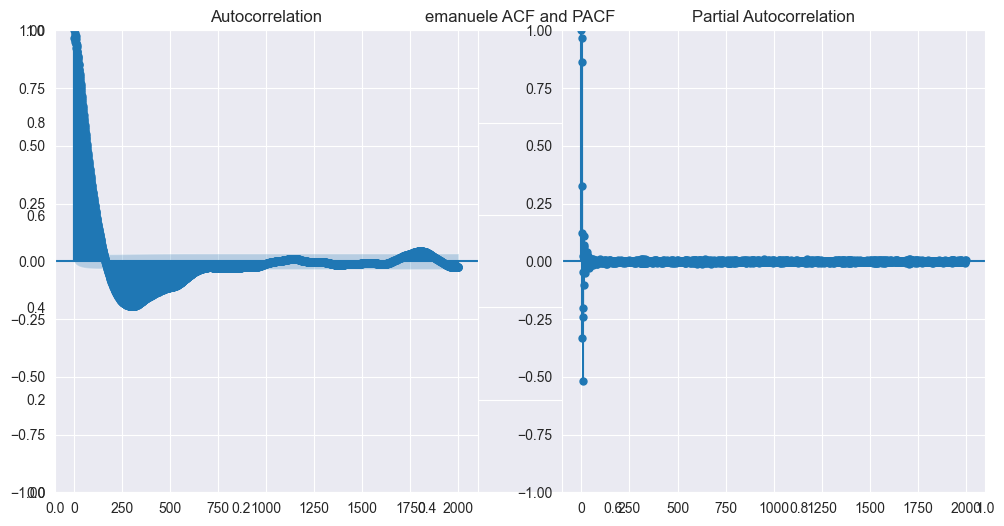

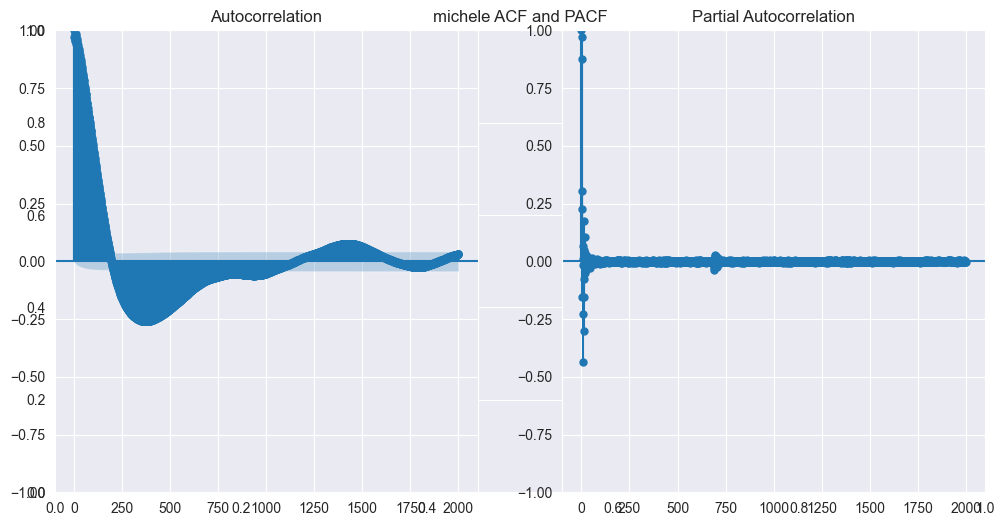

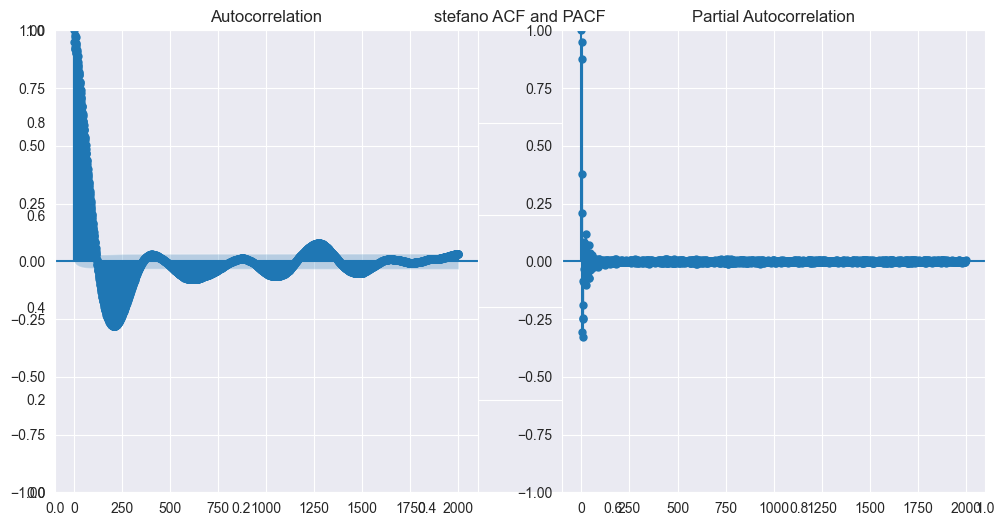

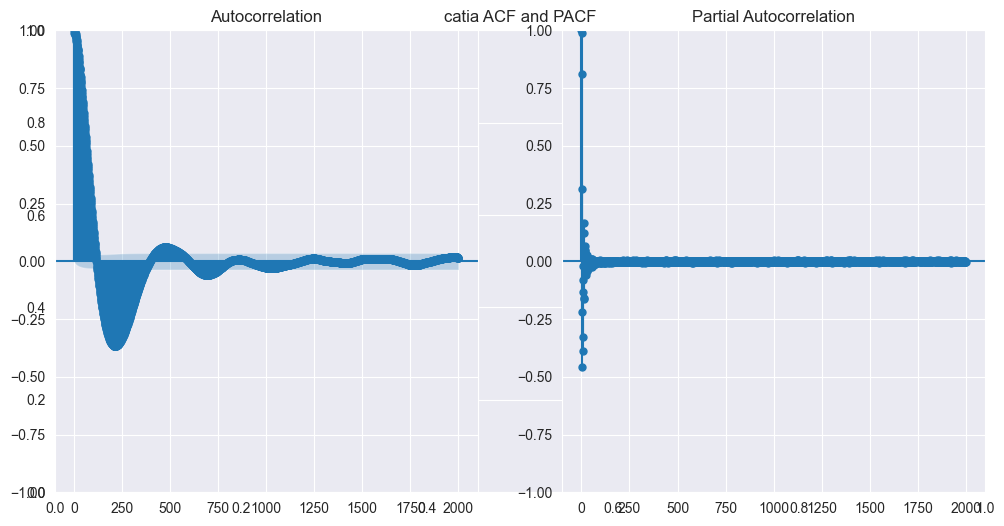

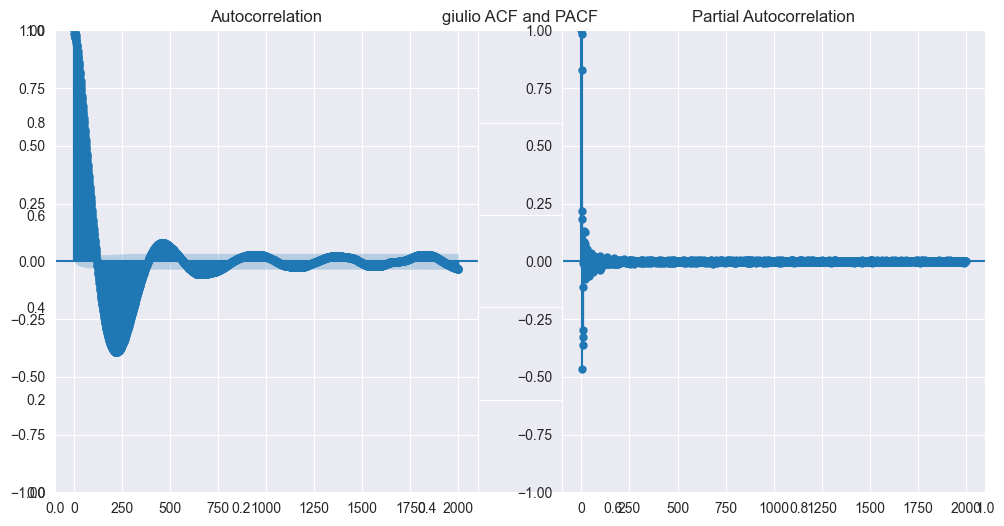

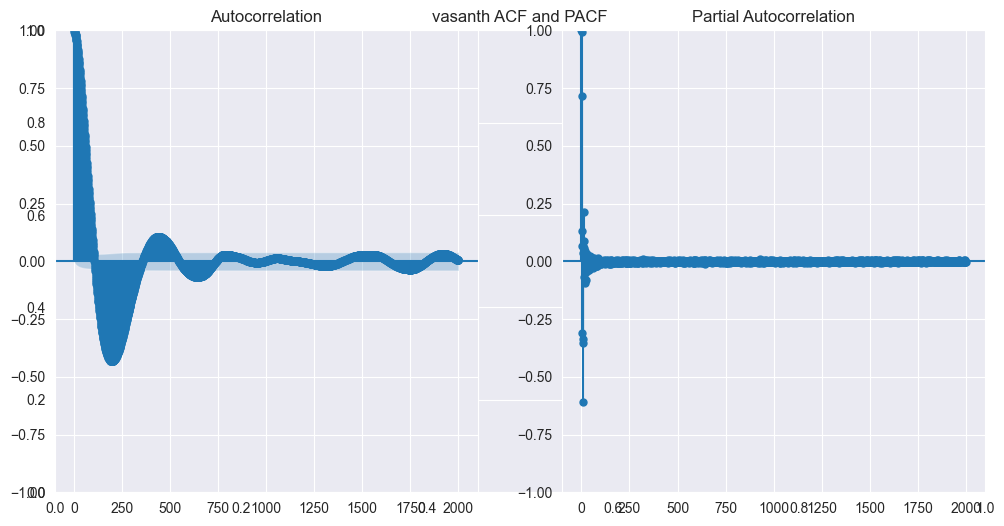

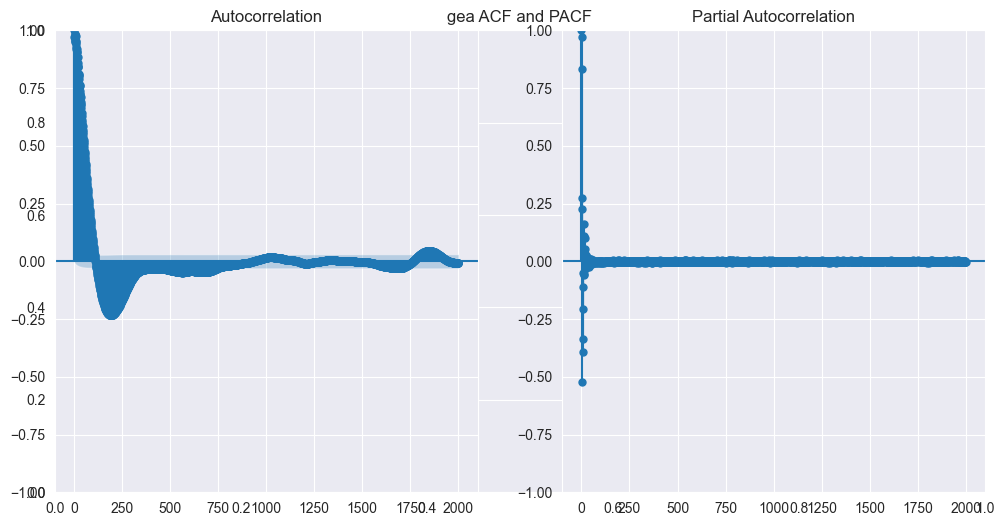

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for name in SWA_data.keys():
    data = SWA_data[name]
    plt.figure(figsize=(12, 6))
    plt.title(name+' ACF and PACF')
    plt.subplot(121)
    plot_acf(data, lags=2000, ax=plt.gca())
    plt.subplot(122)
    plot_pacf(data, lags=2000, ax=plt.gca())
    plt.show()

From the ACF and PACF plots above, we can see that the ACF plot is decaying exponentially and the PACF plot is cut off after a few lags, which indicates that the time series is an AR(10) process, which means that it is short-term dependent.